In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("G:/projects/data/1/adult.csv",na_values = [' ?'])

In [12]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.shape

(48842, 15)

In [16]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [17]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
df = df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [20]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df.income.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [22]:
#Impute most freq missing value 
df["workclass"] = df["workclass"].fillna(df["workclass"].value_counts().index[0])
df["occupation"] = df["occupation"].fillna(df["occupation"].value_counts().index[0])
df["native-country"] = df["native-country"].fillna(df["native-country"].value_counts().index[0])


In [23]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [24]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

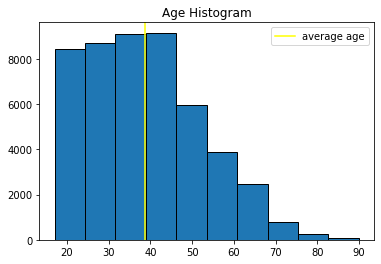

In [26]:
plt.hist(df['age'], edgecolor='black')
plt.title('Age Histogram')
plt.axvline(np.mean(df['age']), color='yellow', label='average age')
plt.legend()

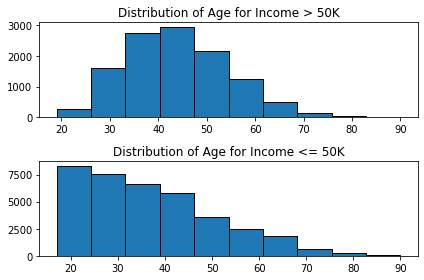

In [27]:
#For Income > 50K, Age is almost normally distributed

#For Income <=50K, Age is positively skewed. More people in the 20s and 30s have income <= 50K.


age50k = df[df['income']==1].age
agel50k = df[df['income']==0].age

fig, axs = plt.subplots(2, 1)

axs[0].hist(age50k, edgecolor='black')
axs[0].set_title('Distribution of Age for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title('Distribution of Age for Income <= 50K')
plt.tight_layout()

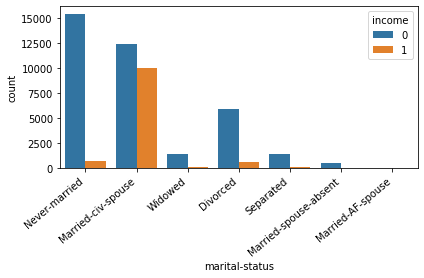

In [29]:
ax = sns.countplot(df['marital-status'], hue=df['income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [31]:
df.replace(['Divorced', 'Married-AF-spouse',  
              'Married-civ-spouse', 'Married-spouse-absent',  
              'Never-married', 'Separated', 'Widowed'], 
             ['divorced', 'married', 'married', 'married', 
              'not married', 'not married', 'not married'], inplace = True)

In [33]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,not married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [35]:
#label Encoder
labelEncoder = preprocessing.LabelEncoder()

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country'] 


# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}, 'race': {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital-status': {'divorced': 0, 'married': 1, 'not married': 2}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'g

In [37]:
#droping redundant columns
df=df.drop(['fnlwgt','educational-num'], axis=1)

In [38]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,1,2,6,3,2,1,0,0,40,38,0
1,38,3,11,1,4,0,4,1,0,0,50,38,0
2,28,1,7,1,10,0,4,1,0,0,40,38,1
3,44,3,15,1,6,0,2,1,7688,0,40,38,1
4,18,3,15,2,9,3,4,0,0,0,30,38,0


In [41]:
#Model
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

X = df.values[:, 0:12]
Y = df.values[:,12]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)



In [43]:
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100 )


Desicion Tree using Gini Index
Accuracy is  83.26622534634545


In [ ]:
import pickle

with open('model_dt.pkl', 'wb') as fid:
    pickle.dump(model_dt, fid,2)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logistic = logreg.predict(X_test)


print('Train/Test split results:')
print("logreg accuracy is %2.3f" % accuracy_score(y_test, y_pred_logistic))

Train/Test split results:
logreg accuracy is 0.802


In [ ]:

with open('model_lr.pkl', 'wb') as fid:
    pickle.dump(model_lr, fid,2)

In [45]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred_randomf=clf.predict(X_test)

from sklearn import metrics
print("test accuracy :",metrics.accuracy_score(y_test,y_pred_randomf))

test accuracy : 0.8486999249300484


In [ ]:
with open('model_rf.pkl', 'wb') as fid:
    pickle.dump(model_rf, fid,2)